# GMT mapping function based on Forster et al 2024 data

Find present-day warming period in models as closest end point in 10 year warming trend, from new Forster 2024 data on obs warming

Todo: do also for 1.5 deg warming, and find also year in SSP for demographics ! 

In [1]:
# necessary: netcdf4-python, regionmask, (xarray, geopandas), openpyxl?, cartopy? statsmodels?

import numpy as np
import pandas as pd
import os, glob
import xarray as xr
import netCDF4
import matplotlib.pyplot as plt


# My settings and functions
from settings_ana import *
start_message() 

from functions_ana import *

flags: {'models': 'ISIMIP3b', 'experiment': None, 'metric': 'WBGT28', 'method': None, 'time_method': None, 'shift_sigma': False, 'shift_period': None, 'shift_loglike': None, 'chunk_version': None, 'var': 'wbgt'}
var: wbgt
VARs: None
indir_p: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3b/InputData/climate/atmosphere/bias-adjusted/global/daily/
indir_s: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3b/SecondaryInputData/climate/atmosphere/bias-adjusted/global/daily/
indir_obs: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3a/InputData/climate/atmosphere/obsclim/global/daily/historical/
indir_counterclim: /data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP3a/InputData/climate/atmosphere/counterclim/global/daily/historical/
GCMs: ['CanESM5', 'CNRM-CM6-1', 'GFDL-ESM4', 'IPSL-CM6A-LR', 'MIROC6', 'MRI-ESM2-0', 'EC-Earth3', 'UKESM1-0-LL', 'MPI-ESM1-2-HR', 'CNRM-ESM2-1']
datasets: ['GSWP3-W5E5', '20CRv3-ERA5', '20CRv3-W5E5']
lat_chunk: 90
lon_chunk: 120
tim

In [2]:
outdir=os.path.join(outdirs, 'output_gmt-mapping')

In [3]:
%matplotlib inline

In [4]:

flags['models'] = 'ISIMIP3b'
df_gmst_mod = merge_model_gmst(GCMs, dir_gmst_models)
df_gmst_mod

,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0,EC-Earth3,UKESM1-0-LL,MPI-ESM1-2-HR,CNRM-ESM2-1
year,,,,,,,,,,
1850,0.096275,0.07598,-0.094941,-0.184196,-0.068196,0.062608,-0.087824,-0.053196,0.009157,0.097922
1851,-0.149725,0.03998,-0.151941,-0.016196,-0.095196,0.087608,0.015176,-0.045196,0.025157,0.266922
1852,-0.101725,0.00998,0.027059,-0.032196,-0.079196,0.021608,0.070176,0.042804,0.199157,0.184922
1853,0.038275,0.03198,0.061059,0.036804,-0.019196,-0.052392,-0.111824,0.104804,0.301157,0.061922
1854,-0.075725,0.03098,-0.113941,0.107804,0.191804,-0.107392,-0.159824,0.030804,0.010157,0.058922
...,...,...,...,...,...,...,...,...,...,...
2096,6.090275,4.75998,3.465059,5.281804,3.370804,3.743608,4.563176,5.822804,3.601157,4.443922
2097,6.278275,4.75398,3.466059,5.512804,3.036804,3.795608,4.910176,6.047804,3.600157,4.466922
2098,6.364275,4.95798,3.442059,5.356804,3.112804,3.624608,5.041176,6.080804,3.676157,4.525922


In [5]:
df_gmst_mod.loc[1850:1900].mean() # anomalies relative to 1850-1900

CanESM5         -1.337492e-14
CNRM-CM6-1      -8.916615e-15
GFDL-ESM4        3.232273e-14
IPSL-CM6A-LR     3.009357e-14
MIROC6          -2.117696e-14
MRI-ESM2-0      -2.117696e-14
EC-Earth3        2.229154e-15
UKESM1-0-LL     -8.916615e-15
MPI-ESM1-2-HR    2.674984e-14
CNRM-ESM2-1      2.786442e-14
dtype: float64

In [6]:
# annual obs warming
df_gmst_obs_annual = pd.read_csv(os.path.join(observed_warming_path_annual)).rename(
    columns={'timebound_lower':'year'}).set_index('year')[['gmst']]

# decadal avg obs warming
df_gmst_obs_decadal = pd.read_csv(observed_warming_path).rename(
    columns={'timebound_upper':'year'}).set_index('year')[['gmst']]
df_gmst_obs_decadal.index = df_gmst_obs_decadal.index-1

In [7]:
df_gmst_obs_annual.loc[1850:1900].mean() # anomalies relative to 1850-1900

gmst   -6.040919e-17
dtype: float64

In [16]:
df_gmst_mod.apply(lambda col: apply_lowess(col, df_gmst_mod.index, ntime=4))

,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0,EC-Earth3,UKESM1-0-LL,MPI-ESM1-2-HR,CNRM-ESM2-1
year,,,,,,,,,,
1850,0.081839,0.075265,-0.116804,-0.163789,-0.073311,0.073341,-0.082681,-0.062625,-0.005754,0.124842
1851,-0.027388,0.041693,-0.073870,-0.071802,-0.082864,0.061162,0.002303,-0.021973,0.078604,0.188433
1852,-0.087118,0.024950,-0.009374,-0.008409,-0.066935,0.019337,-0.004756,0.035597,0.199157,0.173887
1853,-0.054830,0.025412,-0.004595,0.037362,0.026333,-0.047268,-0.075239,0.064067,0.104657,0.095709
1854,-0.061384,0.024409,-0.085900,0.065928,0.191804,-0.040739,-0.128356,0.021006,0.010157,-0.000254
...,...,...,...,...,...,...,...,...,...,...
2096,6.125161,4.733954,3.435702,5.299199,3.125304,3.779781,4.628006,5.891278,3.618147,4.389936
2097,6.248846,4.811054,3.459183,5.345967,3.036804,3.785240,4.909858,5.991796,3.622728,4.476962
2098,6.367561,4.867603,3.484327,5.373768,3.152982,3.818553,4.805906,6.082378,3.681728,4.505526


In [26]:
df_gmst_1mod = merge_model_gmst(GCMs[0], dir_gmst_models)
df_cov_smo = apply_lowess(df_gmst_1mod, df_gmst_mod.index, ntime=4)
df_cov_smo.loc[1850:1860]

year
1850    0.081839
1851   -0.027388
1852   -0.087118
1853   -0.054830
1854   -0.061384
1855   -0.097886
1856   -0.094221
1857   -0.090663
1858   -0.065971
1859   -0.030415
1860   -0.015896
Name: CanESM5, dtype: float64

## try two different methods: AR6 and SR1.5

AR6 (end-point of 10-year average), very jumpy for early decades, but ok recently. SR1.5 (central point of 30-year average, extending current warming rate) is less jumpy but underestimates warming in most recent decades, since rate of warming is accellerating. 

In [5]:
df_gmst_obs_decadal

,gmst
year,
1859,0.016554
1860,0.016554
1861,0.000054
1862,-0.027196
1863,-0.034446
...,...
2019,1.071304
2020,1.097054
2021,1.119554


In [6]:
da_gmt_mapping_ar6 = calc_warming_periods_models_all_years(GCMs, 
                                          dir_gmst_models, 
                                          observed_warming_path,
                                          method='ar6',
                                          min_periods=10,
                                          flatten=False)

da_gmt_mapping_sr15 = calc_warming_periods_models_all_years(GCMs, 
                                          dir_gmst_models, 
                                          observed_warming_path_annual,
                                          method='sr15',
                                          min_periods=10,
                                          flatten=False)

In [7]:
da_gmt_mapping_ar6.sel(feature='year_mod').to_pandas()

model,obs,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0,EC-Earth3,UKESM1-0-LL,MPI-ESM1-2-HR,CNRM-ESM2-1
year,,,,,,,,,,,
1859,1859,1908,1946,1875,1902,1872,1895,1985,1916,1860,1863
1860,1860,1908,1946,1875,1902,1872,1895,1985,1916,1860,1863
1861,1861,1874,1876,1882,1900,1859,1864,1962,1869,1895,1961
1862,1862,1871,1901,1871,1884,1905,1894,1924,1878,1869,1960
1863,1863,1868,1902,1884,1884,1895,1889,1963,1870,1900,1949
...,...,...,...,...,...,...,...,...,...,...,...
2019,2019,2004,2021,2029,2009,2034,2021,2013,2019,2018,2026
2020,2020,2004,2022,2031,2010,2034,2021,2014,2019,2018,2027
2021,2021,2005,2023,2032,2011,2035,2022,2015,2020,2019,2027


<Axes: xlabel='year'>

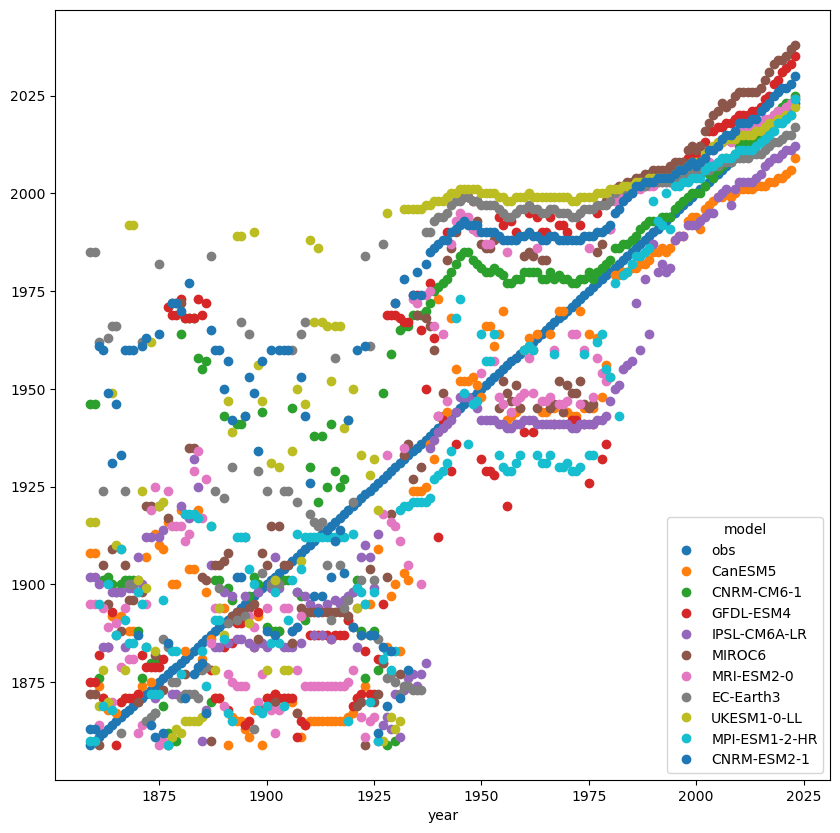

In [8]:
da_gmt_mapping_ar6.sel(feature='year_mod').to_pandas().plot(marker='o', ls='',figsize=(10,10)) # possibly show this fig in SI just from 2000 !

<Axes: xlabel='year'>

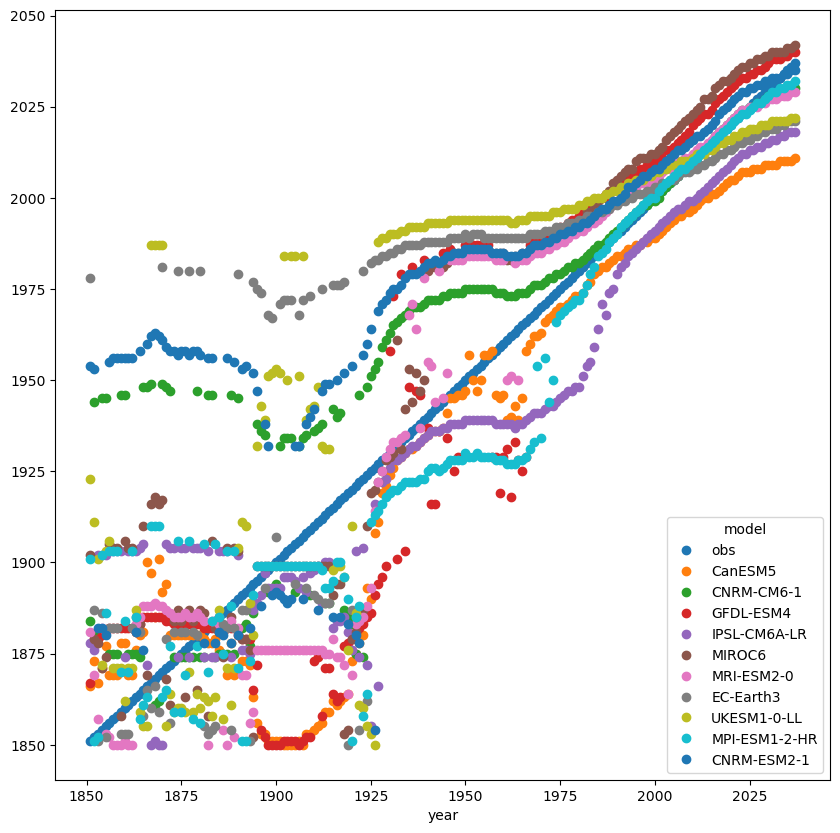

In [9]:
da_gmt_mapping_sr15.sel(feature='year_mod').to_pandas().plot(marker='o', ls='',figsize=(10,10))

## save AR6 method output updated with Forster 2024

In [10]:
# filesavepath = os.path.join(outdirs, 'output_gmt-mapping/df_gmt_mapping_1859_2023_forster2024.csv')
df_save = da_gmt_mapping_ar6.sel(feature='year_mod').to_pandas()
df_save
# df_save.to_csv(filesavepath)

model,obs,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0,EC-Earth3,UKESM1-0-LL,MPI-ESM1-2-HR,CNRM-ESM2-1
year,,,,,,,,,,,
1859,1859,1908,1946,1875,1902,1872,1895,1985,1916,1860,1863
1860,1860,1908,1946,1875,1902,1872,1895,1985,1916,1860,1863
1861,1861,1874,1876,1882,1900,1859,1864,1962,1869,1895,1961
1862,1862,1871,1901,1871,1884,1905,1894,1924,1878,1869,1960
1863,1863,1868,1902,1884,1884,1895,1889,1963,1870,1900,1949
...,...,...,...,...,...,...,...,...,...,...,...
2019,2019,2004,2021,2029,2009,2034,2021,2013,2019,2018,2026
2020,2020,2004,2022,2031,2010,2034,2021,2014,2019,2018,2027
2021,2021,2005,2023,2032,2011,2035,2022,2015,2020,2019,2027


## compare with Forster 2023

In [11]:
df_new = df_save

df_old = pd.read_csv(os.path.join(outdirs, 'output_gmt-mapping/df_gmt_mapping_1859_2022_v270324'),index_col=0)
year_cols = [col for col in df_old.columns if 'year' in col]
df_old = df_old[year_cols]
df_old


,year_CanESM5,year_CNRM-CM6-1,year_GFDL-ESM4,year_IPSL-CM6A-LR,year_MIROC6,year_MRI-ESM2-0
year,,,,,,
1859,1886,1870,1876,1909,1916,1882
1860,1886,1870,1876,1909,1916,1882
1861,1872,1887,1872,1855,1884,1862
1862,1868,1902,1853,1884,1885,1888
1863,1894,1902,1853,1853,1868,1889
...,...,...,...,...,...,...
2018,2003,2020,2028,2009,2033,2020
2019,2004,2021,2029,2009,2034,2021
2020,2004,2022,2031,2010,2034,2022


In [12]:
df_old =df_old.set_axis(GCMs[0:6], axis=1)
df_old

,CanESM5,CNRM-CM6-1,GFDL-ESM4,IPSL-CM6A-LR,MIROC6,MRI-ESM2-0
year,,,,,,
1859,1886,1870,1876,1909,1916,1882
1860,1886,1870,1876,1909,1916,1882
1861,1872,1887,1872,1855,1884,1862
1862,1868,1902,1853,1884,1885,1888
1863,1894,1902,1853,1853,1868,1889
...,...,...,...,...,...,...
2018,2003,2020,2028,2009,2033,2020
2019,2004,2021,2029,2009,2034,2021
2020,2004,2022,2031,2010,2034,2022


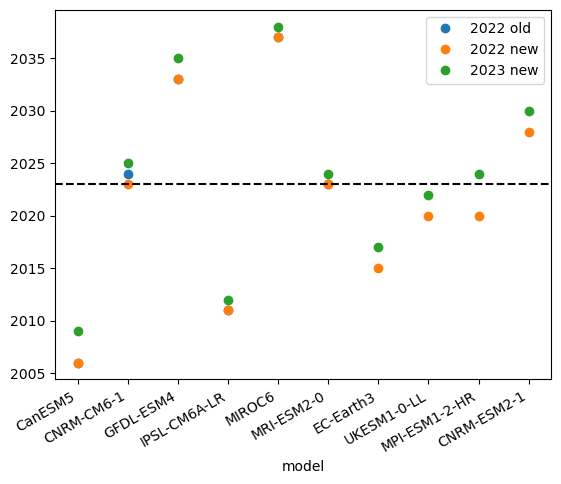

In [13]:
fig, ax = plt.subplots()

# Plot data
df_old.loc[2022].plot(marker='o', ls='', ax=ax, label='2022 old')
df_new.loc[2022][1:].plot(marker='o', ls='', ax=ax, label='2022 new')
df_new.loc[2023][1:].plot(marker='o', ls='', ax=ax, label='2023 new')

# Add horizontal line for 2023
ax.axhline(2023, ls='--', c='k')

# show all models in xlabel
ax.set_xticks(range(len(df_new.columns[1:])))  
ax.set_xticklabels(df_new.columns[1:], rotation=30, ha='right')  

plt.legend()

In [14]:
df_old.loc[2022]

CanESM5         2006
CNRM-CM6-1      2024
GFDL-ESM4       2033
IPSL-CM6A-LR    2011
MIROC6          2037
MRI-ESM2-0      2023
Name: 2022, dtype: int64

In [15]:
df_new.loc[2022][1:]

model
CanESM5          2006
CNRM-CM6-1       2023
GFDL-ESM4        2033
IPSL-CM6A-LR     2011
MIROC6           2037
MRI-ESM2-0       2023
EC-Earth3        2015
UKESM1-0-LL      2020
MPI-ESM1-2-HR    2020
CNRM-ESM2-1      2028
Name: 2022, dtype: object

In [16]:
df_new.loc[2023][1:]

model
CanESM5          2009
CNRM-CM6-1       2025
GFDL-ESM4        2035
IPSL-CM6A-LR     2012
MIROC6           2038
MRI-ESM2-0       2024
EC-Earth3        2017
UKESM1-0-LL      2022
MPI-ESM1-2-HR    2024
CNRM-ESM2-1      2030
Name: 2023, dtype: object

## Find 1.5 time

In [17]:
df_15 = calc_warming_periods_models(GCMs, dir_gmst_models, observed_warming_path, target_temperature=1.5, method='ar6', match='closest', windowsize=30)[['year']]
df_15

,year
model,
CanESM5,2017
CNRM-CM6-1,2037
GFDL-ESM4,2046
IPSL-CM6A-LR,2025
MIROC6,2049
MRI-ESM2-0,2036
EC-Earth3,2026
UKESM1-0-LL,2027
MPI-ESM1-2-HR,2038


In [18]:
df_15_30yr = calc_warming_periods_models(GCMs, dir_gmst_models, observed_warming_path, target_temperature=1.5, method='window', match='crossed', windowsize=30)[['year']]
df_15_30yr

,year
model,
CanESM5,2012
CNRM-CM6-1,2032
GFDL-ESM4,2043
IPSL-CM6A-LR,2020
MIROC6,2044
MRI-ESM2-0,2031
EC-Earth3,2023
UKESM1-0-LL,2023
MPI-ESM1-2-HR,2035


In [19]:
df_2_30yr = calc_warming_periods_models(GCMs, dir_gmst_models, observed_warming_path, target_temperature=2, method='window', match='crossed', windowsize=30)[['year']]
df_2_30yr

,year
model,
CanESM5,2024
CNRM-CM6-1,2046
GFDL-ESM4,2058
IPSL-CM6A-LR,2035
MIROC6,2060
MRI-ESM2-0,2046
EC-Earth3,2039
UKESM1-0-LL,2032
MPI-ESM1-2-HR,2052


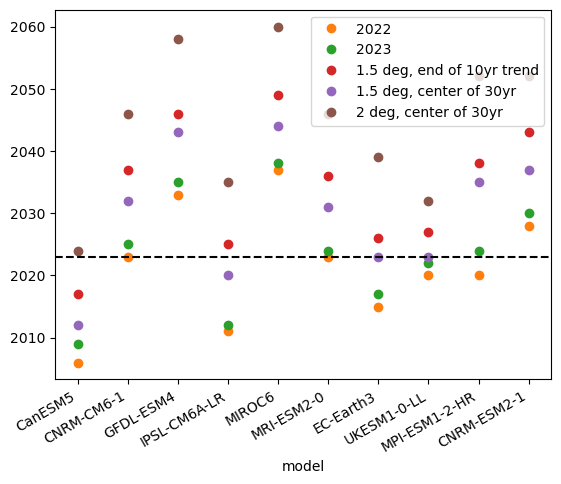

In [20]:
fig, ax = plt.subplots()

# Plot data
#df_old.loc[2022].plot(marker='o', ls='', ax=ax, label='2022 old')
df_new.loc[2022][1:].plot(marker='o', ls='', ax=ax, label='2022',c='C1')
df_new.loc[2023][1:].plot(marker='o', ls='', ax=ax, label='2023',c='C2')
df_15['year'].plot(marker='o', ls='', ax=ax, label='1.5 deg, end of 10yr trend',c='C3' )
df_15_30yr['year'].plot(marker='o', ls='', ax=ax, label='1.5 deg, center of 30yr',c='C4' )
df_2_30yr['year'].plot(marker='o', ls='', ax=ax, label='2 deg, center of 30yr',c='C5' )
# Add horizontal line for 2023
ax.axhline(2023, ls='--', c='k')

# show all models in xlabel
ax.set_xticks(range(len(df_new.columns[1:])))  
ax.set_xticklabels(df_new.columns[1:], rotation=30, ha='right')  

plt.legend()

In [40]:
s1 = df_new.loc[2023][1:]
s2 = df_15_30yr['year'].rename('1.5')
s3 = df_2_30yr['year'].rename('2')

df_merge = pd.concat([s1,s2,s3], axis=1)
df_merge.to_csv(os.path.join(outdir, 'df_central_year_matched_2023_15deg_2deg.csv'))
df_merge

,2023,1.5,2
model,,,
CanESM5,2009,2012,2024
CNRM-CM6-1,2025,2032,2046
GFDL-ESM4,2035,2043,2058
IPSL-CM6A-LR,2012,2020,2035
MIROC6,2038,2044,2060
MRI-ESM2-0,2024,2031,2046
EC-Earth3,2017,2023,2039
UKESM1-0-LL,2022,2023,2032
MPI-ESM1-2-HR,2024,2035,2052


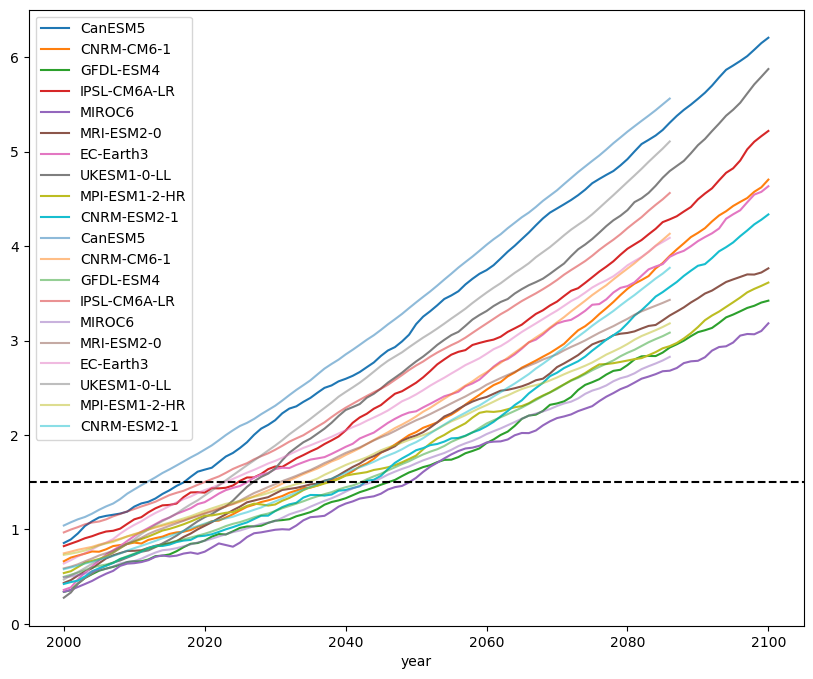

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
df_gmst_mod.rolling(10, center=False).mean().loc[2000:].plot(ax=ax) # end of 10y trend
df_gmst_mod.rolling(30, center=True).mean().loc[2000:].plot(ax=ax, alpha=0.5) # 30y average centered 
ax.axhline(1.5, c='k', ls='--')

## compare closest vs. crossing

Very similar !

In [37]:
calc_warming_periods_models(GCMs, dir_gmst_models, observed_warming_path, target_year=2023, method='ar6', match='closest')


,year,value,target,start_y,end_y
model,,,,,
CanESM5,2009,1.1888,1.192554,1995,2024
CNRM-CM6-1,2025,1.2011,1.192554,2011,2040
GFDL-ESM4,2035,1.1831,1.192554,2021,2050
IPSL-CM6A-LR,2012,1.1811,1.192554,1998,2027
MIROC6,2038,1.1904,1.192554,2024,2053
MRI-ESM2-0,2024,1.2034,1.192554,2010,2039
EC-Earth3,2017,1.1939,1.192554,2003,2032
UKESM1-0-LL,2022,1.208,1.192554,2008,2037
MPI-ESM1-2-HR,2024,1.1839,1.192554,2010,2039


In [23]:
calc_warming_periods_models(GCMs, dir_gmst_models, observed_warming_path, target_temperature=1.5, method='window', match='closest', windowsize=30)


,year,value,target,start_y,end_y
model,,,,,
CanESM5,2012,1.509,1.5,1998,2027
CNRM-CM6-1,2031,1.4849,1.5,2017,2046
GFDL-ESM4,2042,1.4932,1.5,2028,2057
IPSL-CM6A-LR,2020,1.5022,1.5,2006,2035
MIROC6,2044,1.5055,1.5,2030,2059
MRI-ESM2-0,2031,1.5109,1.5,2017,2046
EC-Earth3,2023,1.5027,1.5,2009,2038
UKESM1-0-LL,2023,1.5201,1.5,2009,2038
MPI-ESM1-2-HR,2034,1.494,1.5,2020,2049


In [24]:
calc_warming_periods_models(GCMs, dir_gmst_models, observed_warming_path, target_temperature=1.5, method='window', match='crossed', windowsize=30)



,year,value,target,start_y,end_y
model,,,,,
CanESM5,2012,1.509,1.5,1998,2027
CNRM-CM6-1,2032,1.5182,1.5,2018,2047
GFDL-ESM4,2043,1.5308,1.5,2029,2058
IPSL-CM6A-LR,2020,1.5022,1.5,2006,2035
MIROC6,2044,1.5055,1.5,2030,2059
MRI-ESM2-0,2031,1.5109,1.5,2017,2046
EC-Earth3,2023,1.5027,1.5,2009,2038
UKESM1-0-LL,2023,1.5201,1.5,2009,2038
MPI-ESM1-2-HR,2035,1.5104,1.5,2021,2050


In [25]:
# crossing 

# Calculate the 30-year rolling mean and drop NaN values
df = df_gmst_mod.rolling(30, center=True).mean().dropna()
val=1.5

# Loop through each column in the dataframe
print('temp defined as average of 30-year period')
for i in df.columns:
    # Create a boolean mask where the difference with 1.5 changes from negative to positive
    crossing = (df[i] - val).apply(np.sign).diff()
    
    # Find the first crossing point where the sign changes from negative to positive
    crossing_point = crossing[crossing > 0].index.min()

    # Print the first year where 1.5 is crossed
    
    if pd.notna(crossing_point):
        print(f"{i}: First year {val}°C is crossed = {int(crossing_point)}")


temp defined as average of 30-year period
CanESM5: First year 1.5°C is crossed = 2012
CNRM-CM6-1: First year 1.5°C is crossed = 2032
GFDL-ESM4: First year 1.5°C is crossed = 2043
IPSL-CM6A-LR: First year 1.5°C is crossed = 2020
MIROC6: First year 1.5°C is crossed = 2044
MRI-ESM2-0: First year 1.5°C is crossed = 2031
EC-Earth3: First year 1.5°C is crossed = 2023
UKESM1-0-LL: First year 1.5°C is crossed = 2023
MPI-ESM1-2-HR: First year 1.5°C is crossed = 2035
CNRM-ESM2-1: First year 1.5°C is crossed = 2037


In [26]:
# Calculate the 30-year rolling mean and drop NaN values
df = df_gmst_mod.rolling(30, center=True).mean().dropna()
val=2

# Loop through each column in the dataframe
for i in df.columns:
    # Create a boolean mask where the difference with 1.5 changes from negative to positive
    crossing = (df[i] - val).apply(np.sign).diff()
    
    # Find the first crossing point where the sign changes from negative to positive
    crossing_point = crossing[crossing > 0].index.min()

    # Print the first year where 1.5 is crossed
    if pd.notna(crossing_point):
        print(f"{i}: First year {val}°C is crossed = {int(crossing_point)}")

CanESM5: First year 2°C is crossed = 2024
CNRM-CM6-1: First year 2°C is crossed = 2046
GFDL-ESM4: First year 2°C is crossed = 2058
IPSL-CM6A-LR: First year 2°C is crossed = 2035
MIROC6: First year 2°C is crossed = 2060
MRI-ESM2-0: First year 2°C is crossed = 2046
EC-Earth3: First year 2°C is crossed = 2039
UKESM1-0-LL: First year 2°C is crossed = 2032
MPI-ESM1-2-HR: First year 2°C is crossed = 2052
CNRM-ESM2-1: First year 2°C is crossed = 2052


## Find year for demographics

From MESSAGE-GLOBIOM (IAM) + FaIR (SCM) ssp2/3 + rcp -> 50th percentile warming level 

Find moment in which it crosses 1.5? As end of 10-year trend? Or 30-year period?

In [27]:
filepath_ssp = os.path.join(datadirs,'ar6-scenarios/ar6_snapshot_MESSAGE_temp_ssp2_ssp3.csv')
df_ssp = pd.read_csv(filepath_ssp).iloc[:-1,:].sort_values('Scenario').reset_index(drop=True)
df_ssp

,Model,Scenario,Region,Variable,Unit,2000,2001,2002,2003,2004,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,MESSAGE-GLOBIOM 1.0,SSP2-19,World,AR6 climate diagnostics|Surface Temperature (G...,K,0.762377,0.811932,0.848844,0.872781,0.889803,...,1.260372,1.258137,1.254970,1.249496,1.241250,1.232129,1.222130,1.211593,1.203043,1.195263
1,MESSAGE-GLOBIOM 1.0,SSP2-26,World,AR6 climate diagnostics|Surface Temperature (G...,K,0.762377,0.811932,0.848844,0.872781,0.889803,...,1.644531,1.646104,1.646262,1.643762,1.638138,1.630629,1.622363,1.613779,1.605597,1.598760
2,MESSAGE-GLOBIOM 1.0,SSP2-34,World,AR6 climate diagnostics|Surface Temperature (G...,K,0.762377,0.811932,0.848844,0.872781,0.889803,...,2.045786,2.051355,2.056697,2.057002,2.055512,2.052488,2.049519,2.045785,2.041803,2.040363
3,MESSAGE-GLOBIOM 1.0,SSP2-45,World,AR6 climate diagnostics|Surface Temperature (G...,K,0.762377,0.811932,0.848844,0.872781,0.889803,...,2.382035,2.397706,2.410978,2.419352,2.424855,2.428224,2.432086,2.433840,2.436445,2.442883
4,MESSAGE-GLOBIOM 1.0,SSP2-60,World,AR6 climate diagnostics|Surface Temperature (G...,K,0.762377,0.811932,0.848844,0.872781,0.889803,...,2.816047,2.844565,2.871605,2.894727,2.917546,2.936264,2.953866,2.971094,2.990031,3.011970
5,MESSAGE-GLOBIOM 1.0,SSP2-Baseline,World,AR6 climate diagnostics|Surface Temperature (G...,K,0.762377,0.811932,0.848844,0.872781,0.889803,...,3.167767,3.209181,3.249667,3.286413,3.320357,3.353491,3.385884,3.417936,3.451141,3.486064
6,MESSAGE-GLOBIOM 1.0,SSP3-34,World,AR6 climate diagnostics|Surface Temperature (G...,K,0.762377,0.811932,0.848844,0.872781,0.889803,...,1.813283,1.816363,1.819500,1.819150,1.816813,1.812814,1.808895,1.804556,1.801407,1.799875
7,MESSAGE-GLOBIOM 1.0,SSP3-45,World,AR6 climate diagnostics|Surface Temperature (G...,K,0.762377,0.811932,0.848844,0.872781,0.889803,...,2.202411,2.208751,2.214803,2.217792,2.220073,2.220167,2.218463,2.216689,2.215155,2.215802
8,MESSAGE-GLOBIOM 1.0,SSP3-60,World,AR6 climate diagnostics|Surface Temperature (G...,K,0.762377,0.811932,0.848844,0.872781,0.889803,...,2.723103,2.738572,2.756592,2.772941,2.783761,2.793595,2.802295,2.810224,2.820662,2.831609
9,MESSAGE-GLOBIOM 1.0,SSP3-Baseline,World,AR6 climate diagnostics|Surface Temperature (G...,K,0.762377,0.811932,0.848844,0.872781,0.889803,...,3.723558,3.776534,3.828649,3.876169,3.923146,3.968186,4.012308,4.058291,4.103422,4.151345


In [28]:
colnames = df_ssp['Scenario'].values
df_ssp = df_ssp.iloc[:,5:].T
df_ssp.columns = colnames
df_ssp

,SSP2-19,SSP2-26,SSP2-34,SSP2-45,SSP2-60,SSP2-Baseline,SSP3-34,SSP3-45,SSP3-60,SSP3-Baseline
2000,0.762377,0.762377,0.762377,0.762377,0.762377,0.762377,0.762377,0.762377,0.762377,0.762377
2001,0.811932,0.811932,0.811932,0.811932,0.811932,0.811932,0.811932,0.811932,0.811932,0.811932
2002,0.848844,0.848844,0.848844,0.848844,0.848844,0.848844,0.848844,0.848844,0.848844,0.848844
2003,0.872781,0.872781,0.872781,0.872781,0.872781,0.872781,0.872781,0.872781,0.872781,0.872781
2004,0.889803,0.889803,0.889803,0.889803,0.889803,0.889803,0.889803,0.889803,0.889803,0.889803
...,...,...,...,...,...,...,...,...,...,...
2096,1.232129,1.630629,2.052488,2.428224,2.936264,3.353491,1.812814,2.220167,2.793595,3.968186
2097,1.222130,1.622363,2.049519,2.432086,2.953866,3.385884,1.808895,2.218463,2.802295,4.012308
2098,1.211593,1.613779,2.045785,2.433840,2.971094,3.417936,1.804556,2.216689,2.810224,4.058291
2099,1.203043,1.605597,2.041803,2.436445,2.990031,3.451141,1.801407,2.215155,2.820662,4.103422


<Axes: >

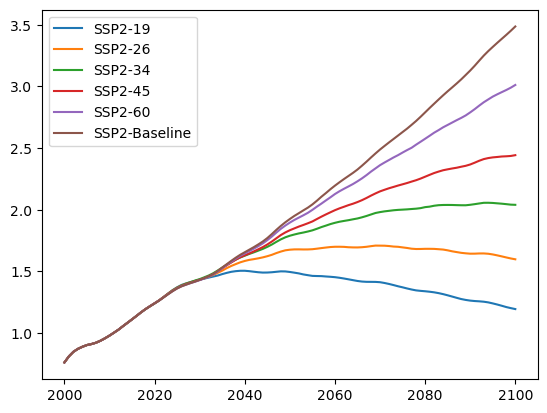

In [29]:
df_ssp2 = df_ssp.iloc[:,:6]
df_ssp2.plot()

<Axes: >

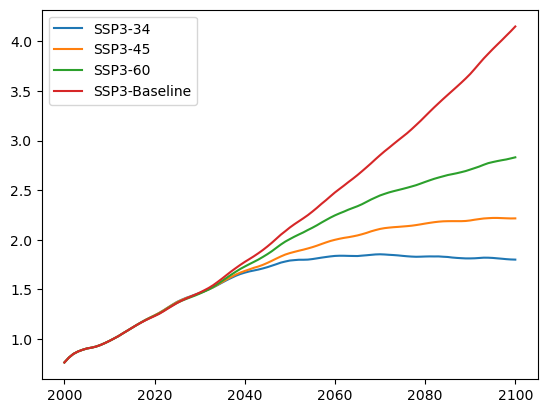

In [30]:
df_ssp3 = df_ssp.iloc[:,6:]
df_ssp3.plot()

## Find from SSP2 as end of 10-year trend, then as 30-year avg

<Axes: >

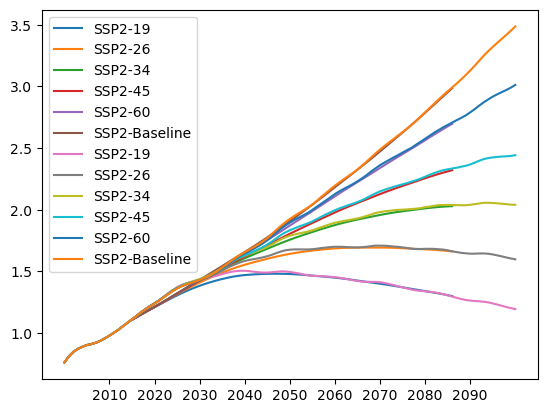

In [31]:
fig, ax=plt.subplots()
df = df_ssp2.rolling(30,center=True).mean() #.dropna()
df.plot(ax=ax)
df_ssp2.plot(ax=ax)

In [32]:
df.dropna()

,SSP2-19,SSP2-26,SSP2-34,SSP2-45,SSP2-60,SSP2-Baseline
2015,1.109463,1.109067,1.109059,1.108269,1.107475,1.107270
2016,1.131848,1.131442,1.131583,1.130605,1.129727,1.129594
2017,1.152850,1.152546,1.152934,1.151719,1.150759,1.150719
2018,1.172905,1.172815,1.173551,1.172113,1.171055,1.171136
2019,1.192441,1.192778,1.193978,1.192295,1.191168,1.191375
...,...,...,...,...,...,...
2082,1.328570,1.675682,2.019411,2.279299,2.609733,2.853049
2083,1.322104,1.673089,2.022729,2.290507,2.632159,2.886241
2084,1.315295,1.670037,2.025517,2.301133,2.654204,2.919367
2085,1.308213,1.666561,2.027770,2.311249,2.676012,2.952506


In [33]:
# Calculate the 30-year rolling mean and drop NaN values
df = df_ssp2.rolling(30, center=True).mean().dropna()

# Loop through each column in the dataframe
for i in df.columns:
    # Create a boolean mask where the difference with 1.5 changes from negative to positive
    crossing = (df[i] - 1.5).apply(np.sign).diff()
    
    # Find the first crossing point where the sign changes from negative to positive
    crossing_point = crossing[crossing > 0].index.min()

    # Print the first year where 1.5 is crossed
    if pd.notna(crossing_point):
        print(f"{i}: First year 1.5°C is crossed = {int(crossing_point)}")
    else:
        print(f"{i}: 1.5°C not crossed")


SSP2-19: 1.5°C not crossed
SSP2-26: First year 1.5°C is crossed = 2036
SSP2-34: First year 1.5°C is crossed = 2034
SSP2-45: First year 1.5°C is crossed = 2034
SSP2-60: First year 1.5°C is crossed = 2034
SSP2-Baseline: First year 1.5°C is crossed = 2034


In [34]:
# Calculate the 30-year rolling mean and drop NaN values
df = df_ssp3.rolling(30, center=True).mean().dropna()

# Loop through each column in the dataframe
for i in df.columns:
    # Create a boolean mask where the difference with 1.5 changes from negative to positive
    crossing = (df[i] - 1.5).apply(np.sign).diff()
    
    # Find the first crossing point where the sign changes from negative to positive
    crossing_point = crossing[crossing > 0].index.min()

    # Print the first year where 1.5 is crossed
    if pd.notna(crossing_point):
        print(f"{i}: First year 1.5°C is crossed = {int(crossing_point)}")
    else:
        print(f"{i}: 1.5°C not crossed")

SSP3-34: First year 1.5°C is crossed = 2033
SSP3-45: First year 1.5°C is crossed = 2033
SSP3-60: First year 1.5°C is crossed = 2032
SSP3-Baseline: First year 1.5°C is crossed = 2031


### for 2 deg

In [35]:
# Calculate the 30-year rolling mean and drop NaN values
df = df_ssp2.rolling(30, center=True).mean().dropna()
target=2

# Loop through each column in the dataframe
for i in df.columns:
    # Create a boolean mask where the difference with 1.5 changes from negative to positive
    crossing = (df[i] - target).apply(np.sign).diff()
    
    # Find the first crossing point where the sign changes from negative to positive
    crossing_point = crossing[crossing > 0].index.min()

    # Print the first year where 1.5 is crossed
    if pd.notna(crossing_point):
        print(f"{i}: First year {target}°C is crossed = {int(crossing_point)}")
    else:
        print(f"{i}:  {target}°C not crossed")

SSP2-19:  2°C not crossed
SSP2-26:  2°C not crossed
SSP2-34: First year 2°C is crossed = 2078
SSP2-45: First year 2°C is crossed = 2062
SSP2-60: First year 2°C is crossed = 2056
SSP2-Baseline: First year 2°C is crossed = 2054


In [36]:
# Calculate the 30-year rolling mean and drop NaN values
df = df_ssp3.rolling(30, center=True).mean().dropna()
target=2

# Loop through each column in the dataframe
for i in df.columns:
    # Create a boolean mask where the difference with 1.5 changes from negative to positive
    crossing = (df[i] - target).apply(np.sign).diff()
    
    # Find the first crossing point where the sign changes from negative to positive
    crossing_point = crossing[crossing > 0].index.min()

    # Print the first year where 1.5 is crossed
    if pd.notna(crossing_point):
        print(f"{i}: First year {target}°C is crossed = {int(crossing_point)}")
    else:
        print(f"{i}:  {target}°C not crossed")

SSP3-34:  2°C not crossed
SSP3-45: First year 2°C is crossed = 2062
SSP3-60: First year 2°C is crossed = 2051
SSP3-Baseline: First year 2°C is crossed = 2048
